# Using TF-IDF to Cluster Similar Documents

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [20]:
def iterate_through_files():
    filepath = '/full/path/to/.../abstracts'
    for root, dirs, files in os.walk(filepath):        
        for file in filter(lambda file: file.endswith('.txt'), files):
            if file[:2] in ['AT','TE'] and file[3:7] in ['2014','2015']:
                f = open(os.path.join(filepath, file), 'r')
                contents = f.read()
                f.close
                yield (file,contents) #creates a generator object

In [21]:
gather = iterate_through_files()
dict_of_files = {}
for (filename, contents) in gather:
    dict_of_files[filename] = contents

In [22]:
doc_text = pd.DataFrame.from_dict(data = dict_of_files, orient='index', columns = ['text'])
doc_text.reset_index(inplace=True)
doc_text.columns = ['document','text']
doc_text['track'] = doc_text['document'].apply(lambda x: x[0:x.find('-')] )
doc_text['track'] = pd.Categorical(doc_text['track'])
doc_text.head()

,document,text,track
0,AT-2015-Lawsure[94].txt,Key Performance Indicators (KPI) are becoming ...,AT
1,TE-2014-Bowers[68].txt,Interest in using game technologies to improve...,TE
2,TE-2015-Maraj[104].txt,The ability to read the human terrain is an in...,TE
3,AT-2014-Lackey[81].txt,Translating results from laboratory-based rese...,AT
4,TE-2015-Hackett[60].txt,Medical mannequins are used for a wide range o...,TE


In [23]:
doc_ref = list(doc_text['document']) # Create a list of document titles for labels
text = list(doc_text['text']) # Create a list of document text for analysis

## Remove stopwords and stemming
**Stopwords** are words that offer little information from a comparative perspective. These words include 'I', 'he', and 'it', for instance. They are removed within the tokenizer to reduce clustering on these types of words. **Stemming** is the action of creating tokens based on similar roots like 'run', 'running', and 'ran'. In this analysis, the docs are tokenized and stopwords are eliminated. Two final sets are created (with and without stemming) to preserve original words for visualization.

In [24]:
# load nltk's SnowballStemmer as variabled 'stemmer'
from nltk.stem.snowball import SnowballStemmer # Combine similar words into a token
stemmer = SnowballStemmer("english")

docs = [' '.join([stemmer.stem(word) for word in doc.split(' ') if word.isalpha()])
          for doc in text] # remove punctuation as well

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer
vect = TfidfVectorizer(ngram_range=(1,2))  # Convert text documents to token counts
X = vect.fit_transform(docs) # Learn vocabulary and return document-term matrix
df = pd.DataFrame(X.toarray(), columns=vect.get_feature_names())
print(f'The document-term matrix is {df.shape[0]} documents by {df.shape[1]} word tokens.\n')
for c in df.columns:
    print(c)

The document-term matrix is 45 documents by 7147 word tokens.

abdomen
abdomen inform
abdomin
abdomin caviti
abil
abil of
abil to
abl
abl to
about
about bioterror
about model
about perform
about the
academ
academ and
academ seek
academ the
accept
accept data
accept propos
access
access by
access for
access is
access to
acclim
acclim with
accommod
accommod differ
accommod multipl
accomplish
accomplish fluid
accomplish in
accomplish on
account
account for
account law
account offic
accur
accur assess
accur improv
accur model
accur over
accur reflect
accur simul
accuraci
accuraci and
accuraci of
achiev
achiev and
achiev certain
achiev in
achiev these
achiev this
acquisit
acquisit and
acquisit communiti
acquisit effort
acquisit system
acquisit the
across
across the
across various
across wide
action
action from
action may
action requir
activ
activ by
activ on
acut
acut requir
ad
ad histor
ad thin
adapt
adapt approach
adapt plan
adapt train
adapt work
add
add rigor
addit
addit evolutionari
ad

due to
dure
dure an
dure emerg
dure his
dure the
dure this
dure train
dynam
dynam model
dynam motion
dynam scenario
dynam stimul
dynam terrain
dynam that
each
each allow
each cue
each in
each individu
each mission
each of
each site
each task
each the
each year
earli
earli in
earli the
earli usabl
earlier
earlier find
earliest
earliest of
eas
eas of
easili
easili restor
easili through
economi
economi provid
edit
edit and
educ
educ and
educ are
educ in
educ purpos
educ train
effect
effect achiev
effect adapt
effect develop
effect driver
effect instruct
effect is
effect motion
effect of
effect offer
effect on
effect remain
effect simul
effect this
effect to
effect train
effect use
effect virtual
effect way
effici
effici generat
effici help
effici materi
effici of
effici storag
effort
effort by
effort focus
effort have
effort impact
effort need
effort sought
effort that
either
either on
either unawar
electr
electr trainer
electr util
element
element and
element into
element repeat
elicit
e

larger
larger effort
larger inform
largest
largest challeng
last
last section
last three
last video
later
later can
latter
latter two
launch
launch an
law
law enforc
lay
lay the
laydown
laydown to
layout
layout and
lead
lead caus
lead to
leader
leader in
leader need
leadership
leadership attribut
leadership chang
leadership over
leadership the
learn
learn access
learn environ
learn from
learn hold
learn in
learn metric
learn onli
learn through
learn throughout
learn tool
learn use
learn without
learningtrain
learningtrain and
learningtrain system
led
led to
lesson
lesson challeng
lesson learn
level
level it
level of
level to
leverag
leverag by
leverag inher
leverag object
leverag the
leverag virtual
licens
licens and
life
life and
life of
life this
life with
lifecycl
lifecycl cost
like
like scenario
like to
like word
likelihood
likelihood and
likelihood of
limit
limit and
limit particip
limit set
line
line with
link
link simul
link this
literatur
literatur demand
literatur on
literatur

recent
recent academ
recent began
recent effort
recent report
recent research
recent simul
recent while
recogn
recogn reflect
recogn that
recognit
recognit system
recommend
recommend for
recommend provid
recommend simul
reconnaiss
reconnaiss for
reconstruct
reconstruct mock
reconstruct popul
record
record use
reduc
reduc complic
reduc the
reduc traine
reduct
reduct of
refer
refer this
refin
refin the
reflect
reflect and
reflect as
reflect on
reflect what
regard
regard the
regardless
regardless of
region
region that
regular
regular it
relat
relat to
relationship
relationship between
relationship in
relationship to
relev
relev but
relev knowledg
relev recommend
relev while
reliabl
reliabl recent
relianc
relianc upon
remain
remain challeng
remain focus
remain the
remot
remot tactic
renew
renew focus
repeat
repeat and
repeat mani
repeat methodolog
replay
replay capabl
replic
replic for
replic in
replic method
replic the
replic with
report
report by
report issu
report provid
report which
re

traumat
traumat injuri
treatment
treatment facil
treatment group
treatment screen
tree
tree for
trend
trend and
trend are
trend within
trial
trial popul
trial result
trial statist
triangular
triangular mesh
troop
troop engag
troop with
truli
truli realist
ture
ture open
ture test
turn
turn inform
turnov
turnov across
tutor
tutor system
twelv
twelv workshop
twenti
twenti instructor
two
two differ
two framework
two futur
two group
two predictor
two real
two relev
two step
two virtual
two visual
type
type and
type are
type of
type to
type which
typic
typic restrict
ug
ug oper
ultim
ultim enhanc
ultim measur
unawar
unawar of
uncertain
uncertain of
uncertainti
uncertainti has
uncertainti to
uncov
uncov through
under
under chang
under contract
under gpl
under increas
under model
under the
under uncertainti
understand
understand capabl
understand of
understand the
understood
understood and
undertaken
undertaken anywher
unforeseen
unforeseen rippl
uniform
uniform and
uniqu
uniqu cabl
uniqu in


In [26]:
from scipy.spatial.distance import pdist

dist = pdist(X=df, metric='cosine') # Same result but returns only upper diagonal
print(dist)

[0.92126523 0.92793277 0.93885262 0.92769486 0.92792865 0.9336328
 0.8388781  0.88407415 0.94994003 0.90725789 0.94190825 0.88958331
 0.91600157 0.94014105 0.92096426 0.89219087 0.92969728 0.8944557
 0.91414167 0.85396857 0.90819756 0.89925581 0.92266897 0.91806963
 0.93084508 0.91007    0.9248495  0.9038101  0.91145993 0.93342223
 0.90189177 0.90627437 0.94353927 0.89772597 0.83788694 0.94767432
 0.91588957 0.93148649 0.87342557 0.92039511 0.91720998 0.92856609
 0.89703608 0.89635342 0.91543294 0.95479499 0.90741476 0.91322166
 0.93420876 0.88422942 0.85882077 0.93978369 0.91856124 0.92471303
 0.8898636  0.89892899 0.9367161  0.89936307 0.87651728 0.92746228
 0.92992657 0.92013909 0.9019906  0.90742597 0.90993958 0.94300795
 0.91506159 0.89123672 0.93202864 0.91527911 0.92303424 0.93933942
 0.94712908 0.93498036 0.90143011 0.94530535 0.93946642 0.90669778
 0.93023771 0.90811888 0.91116605 0.90272543 0.91205829 0.89241744
 0.90478452 0.91170601 0.92533683 0.90687985 0.90911793 0.910331

## Cluster Resulting Distances Using Agglomerative Hierarchical Clustering

Using the distance matrix, hierarchical clustering groups documents together based on their similarity (small distance from one another). The libraries `dendrogram` and `linkage` supply the clustering algorithm and the visualization canvas, respectively.

Ward clustering is an agglomerative clustering method. **Agglomerative** means the algorithm begins with individual documents as separate clusters and proceeds to merge those most similar to each other as it steps through all documents. The final result is a single cluster containing all documents.

The best linkage method is "average" with: 0.715273457832535


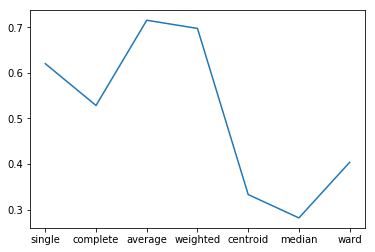

In [27]:
from scipy.cluster.hierarchy import cophenet, linkage

methods = ['single', 'complete', 'average','weighted','centroid','median','ward']

results = []
for meth in methods:
    input = linkage(dist, method=meth) 
    c, coph_dists = cophenet(input, dist)
    results.append(c)


plt.plot(methods,results)

best = results.index(max(results))
opt_link = methods[best]
print(f'The best linkage method is "{opt_link}" with: {results[best]}')
from scipy.cluster.hierarchy import dendrogram, linkage

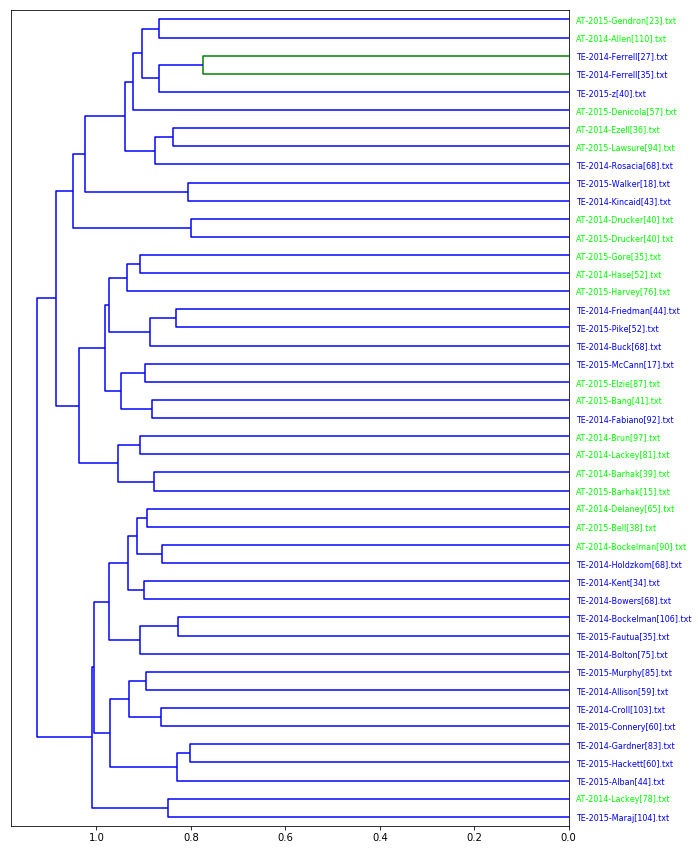

In [28]:
from scipy.cluster.hierarchy import dendrogram, linkage

input = linkage(dist, method='ward')#opt_link) 
dend, axes = plt.subplots(figsize = (10,15))

dend = dendrogram(input, orientation='left', labels = doc_ref)
axes.tick_params(axis='x', which='both')

#create category color coding as dictionary {'code': value, ...}
cats = list(doc_text['track'].cat.categories)
cats.sort()
code = dict.fromkeys(set(cats)) #create empty dictionary
#fill dictionary from 0 to n-1
counter = 0
for i in code:
    code[i] = counter
    counter += 1

# Create a color palette with a color for each track
my_palette = plt.cm.get_cmap("brg", len(set(doc_text['track'])))

ax = plt.gca()
xlbls = ax.get_ymajorticklabels()
num = -1
for lbl in xlbls:
    num += 1
    end=str(lbl).find('-')
    val = str(lbl)[end-2:end]
    color = code[val]
    lbl.set_color(my_palette(color))

plt.savefig('./graphics/toy_cluster.png', dpi=300, bbox_inches = 'tight') # Uncomment to output image to file

In the figure above, the x-axis represents a measure of distance and the y-axis lists all the individual documents. Examining the figure, the x-axis goes from right to left indicating increasing distance. This distance measures determines when the algoritm merges two entities into a cluster.